# Capstone Project Write Up

## Structure

1) Problem statement and summary of key results

2) Data exploration

3) ML model

4) Results

5) Conclusions and client recommendations


## Problem Statement and Summary of Key results

The goal of this challenge is to to predict 6 weeks of daily sales for 1,115 stores located across Germany, based on the provided data. The user is given two sets of data (that can be easily merged together) that contain a wealth of information about each store, e.g. promotions, competitors, school and state holidays, seasonality, and locality. 

The key results are as follows:

1) 

## Data Exploration

In this competition, the user is given a wealth of data. There are two data sets:

- A historical dataset that includes the sale of each store over the past two years together with some other information about promotions, holidays, dates, etc. Note that each store is identified with a unique ID #.

- A second dateset that contains store-specific information, such as its assortment, its competitors, the types and deates of promotions, etc.

A full data exploration can be found in the DataExploration iPython notebook in my GitHub account. Here I only report some of the key findings:

1) There are (broadly speaking) **two types of features: spatial and temporal**. The store ID, type, assortment and nearest competitor's distance are spatial features, while all the others are temporal.

2) Several of these features contain similar information; as an example, the store ID also intrinsically contains information about the assortment and type of store. So one has to carefully select which features to input in the ML model

3) Based on my exploratory analysis, there are **only a few features that seem to be good predictors** of the store sale: the store ID, DayOfWeek and Promo plus some other temporal variables I have engineered, such as the month of the year. Some images are reported below.

My machine learning model will therefore be based on these variables and will be described below.




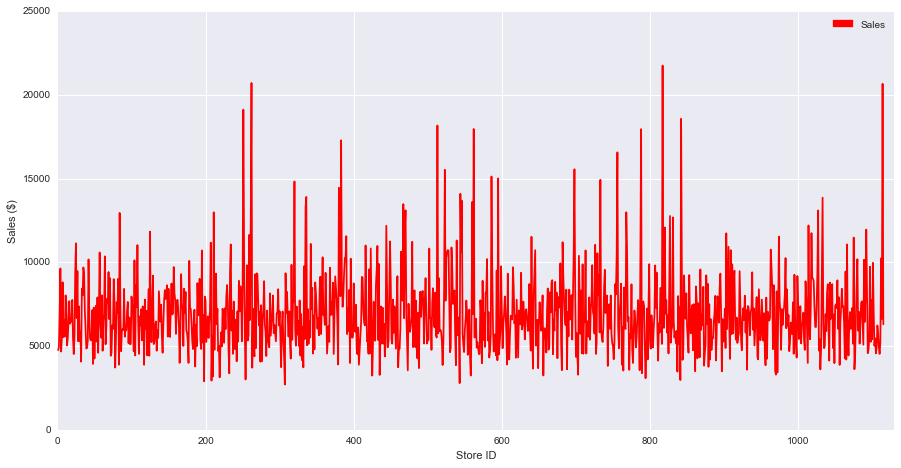

In [27]:
plt.figure(figsize=(15,7.5))
y = concat.groupby('Store')['Sales'].mean()
x = concat.groupby(['Store'])['Store'].mean()
plt.plot(x, y, color = 'red', label = 'Sales')
plt.xlabel('Store ID')
plt.ylabel('Sales ($)')
red_patch = mpatches.Patch(color='red', label='Sales')
plt.legend(handles=[red_patch])
pylab.xlim([0,1130])
plt.show()


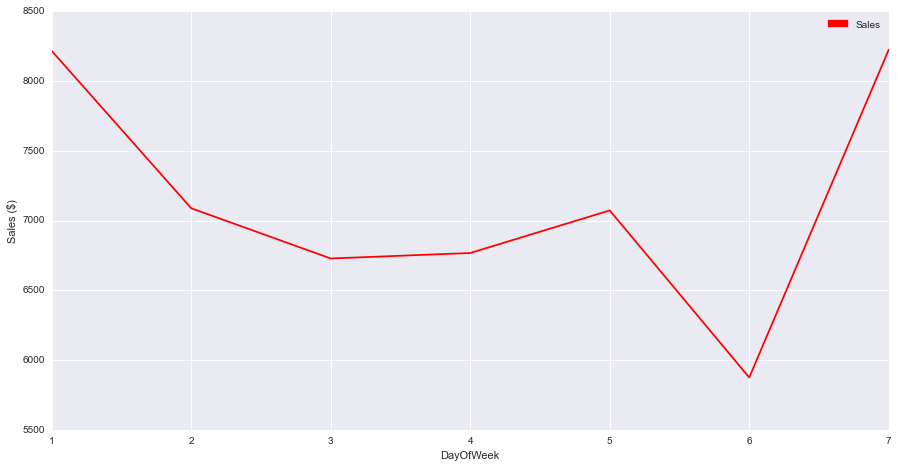

In [31]:
plt.figure(figsize=(15,7.5))
y = concat.groupby('DayOfWeek')['Sales'].mean()
x = concat.groupby(['DayOfWeek'])['DayOfWeek'].mean()
plt.plot(x, y, color = 'red', label = 'Sales')
plt.xlabel('DayOfWeek')
plt.ylabel('Sales ($)')
red_patch = mpatches.Patch(color='red', label='Sales')
plt.legend(handles=[red_patch])
pylab.xlim([1,7])
plt.show()

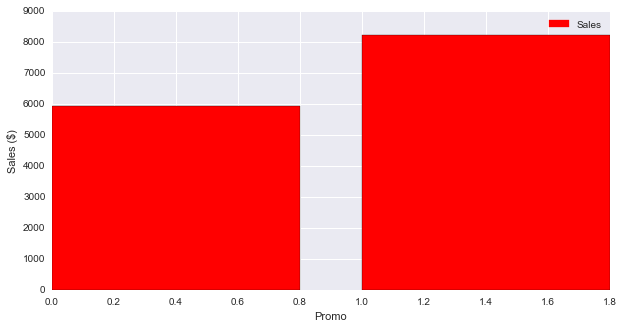

In [37]:
plt.figure(figsize=(10,5))
y = concat.groupby('Promo')['Sales'].mean()
x = concat.groupby(['Promo'])['Promo'].mean()
plt.bar(x, y, color = 'red', label = 'Sales')
plt.xlabel('Promo')
plt.ylabel('Sales ($)')
red_patch = mpatches.Patch(color='red', label='Sales')
plt.legend(handles=[red_patch])
plt.show()

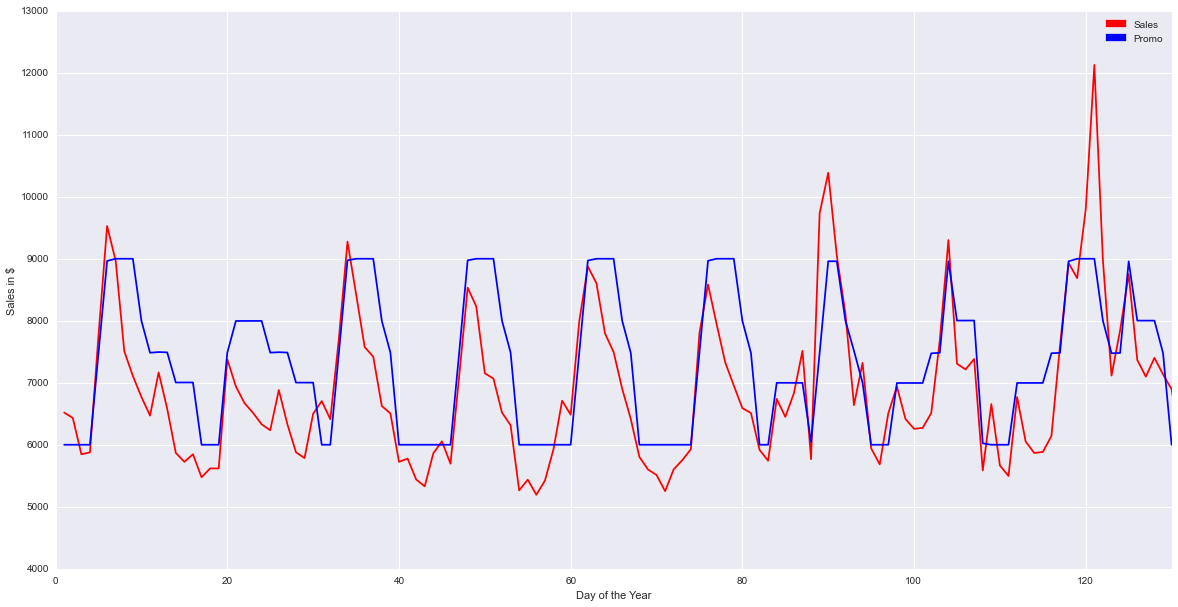

In [46]:
concat['Date3'] = pd.to_datetime(concat['Date']).dt.dayofyear
plt.figure(figsize=(20,10))
y = concat.groupby(['Date3'])['Sales'].mean()
z = 6000+3000*concat.groupby(['Date3'])['Promo'].mean()
x = concat.groupby(['Date3'])['Date3'].mean()
plt.plot(x, y, color = 'red', label = 'Sales')
plt.plot(x, z, color = 'blue')
plt.xlabel('Day of the Year')
plt.ylabel('Sales in $')
red_patch = mpatches.Patch(color='red', label='Sales')
blue_patch = mpatches.Patch(color='blue', label='Promo')
plt.legend(handles=[red_patch, blue_patch])
pylab.xlim([0,130])
plt.show()

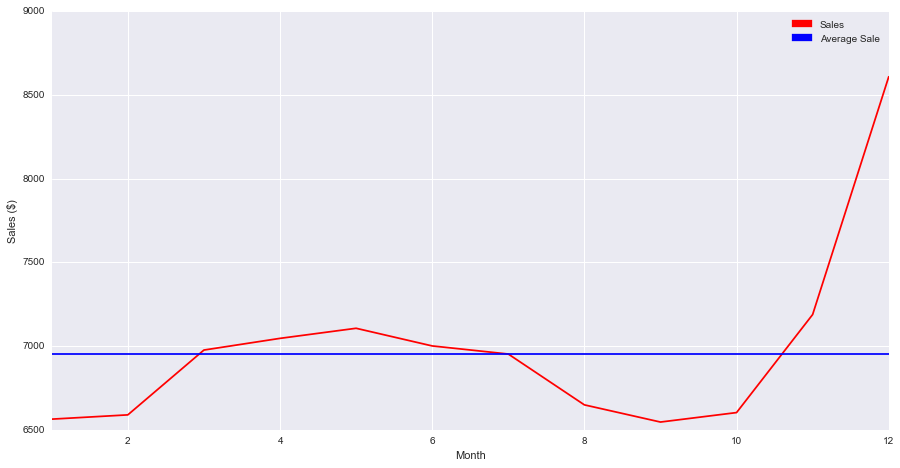

12

In [45]:
plt.figure(figsize=(15,7.5))
y = concat.groupby('Date2')['Sales'].mean()
x = concat.groupby(['Date2'])['Date2'].mean()
z = [data['Sales'].mean()] * 12
plt.plot(x, y, color = 'red', label = 'Sales')
plt.plot(x, z, color = 'blue', label = 'Average Sales')
plt.xlabel('Month')
plt.ylabel('Sales ($)')
red_patch = mpatches.Patch(color='red', label='Sales')
blue_patch = mpatches.Patch(color='blue', label='Average Sale')
plt.legend(handles=[red_patch, blue_patch])
pylab.xlim([1,12])
plt.show()


## Machine Learning Model: the nitty gritty details

I have created a python script to perform a ML simulation of the avaialble data. Here I report some of the technical details (data cleaning, algorithm selection, ect). The python code I have written is available on GitHub.

### Data cleaning

The data in the train and test files does not contain any null values (with the exception of one missing value in the test.csv file for the Open variable which I set to 1). A few variables in these files are categorical (e.g. a, b, c, d), these can be easily converted into numerical variables (i.e. 0, 1, 2, 3).

The store.csv file has features that contain plenty of missing values. So far, I have not used these features, since my exploratory analysis did not show any interesting correlation.

### Machine learning algorithms

Due to the categorical nature of the features I intend to use, a decision tree-type algorithm (e.g. decision tree, random forest or bagging regressor) seems most appropriate. In order to use other types of regressors (say linear ones), one would have to encode the data into several dummy variables, using a OneHotEncoder. This becomes very computationall expensive (this is especially true for the store ID, since there are 1115 stores, meaning one will have to create 1115 dummy variables). Furthermore this procedure does not yield better results than decision tree algorithms anyway.

In summary, decision tree, random forest and bagging regressor all seem to work very well and give comparable performance. In most of the discussion below, I will limit myself to a random forest (RF) algorithm, since this is also considered a benchmark algorithm in the Kaggle community. I have also explored different values for some of the RF parameters (n_estimators, min_samples_split, etc.) but found that these have a negligible effect on the model accuracy.


## Results

In the table below, I report the accuracy (this is the $R^2$ as calculated by sklearn on the train dataset!) of my ML model when using different features. In select cases, I also report the Root Mean Square Percentage Error (RMSPE), the metric used for this Kaggle competition calculated from my train dataset, and the Kaggle score (an RMSPE obatined by submitting my prediction for the test dataset to Kaggle.com). One can see that the store ID can already account for almost 60% of the observed variability. The other features (on their own) do a much poorer job. When using more than one feature, the accuracy improves significantly. For instance, combing  Store ID and Promo, gives 75.9% accuracy. Combining four features (Store ID, Promo, DayOfWeek & Month) increases the accuracy to beyond 90%!

|Features Used|Accuracy ($R^2$)| RSMEP  | Kaggle score |
|---|---|
| Store ID   |  57%   | 0.36 |  |
| Promo      |  16.3% |   |  | 
| DayOfWeek  |  5.99%  |  |  | 
| Month      |  1.94%  | 0.56 |  |
| Store ID & Promo | 75.9% | 0.27 | 0.179 |
|Store ID, Promo, DayOfWeek & Month| 85.5%| 0.22 | 0.139 |
|Store ID, Promo, DayOfWeek & Month| **90.2%**| **0.17** | **0.155** |

The results shown above seem very promising. However, there are also a few caveats. First of all, there is some variability between the RSMEP calculated from my train data and those of the Kaggle submission. Most importantly (and somehow frustratingly), **adding the month feature does not improve my prediction**! This is surprising, especially if one considers that the test dataset contains data from August and September only, i.e. those two months when sales are significantly below the yearly average (see figure above). 



In [3]:
%pylab inline
import csv as csv 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import math
import datetime
from datetime import datetime
import seaborn
from time import time

Populating the interactive namespace from numpy and matplotlib


In [4]:
# Reads the train and store data sets and merges them using Store column
data = pd.DataFrame.from_csv(open('/Users/dadda/Dropbox (MIT)/Kaggle Competitions/RSS/train.csv', 'rb',), index_col=None) 
extra_data = pd.DataFrame.from_csv(open('/Users/dadda/Dropbox (MIT)/Kaggle Competitions/RSS/store.csv', 'rb',), index_col=None) 
data = data[data.Open == 1]
concat = pd.merge(data, extra_data, on = 'Store')
test = pd.DataFrame.from_csv('/Users/dadda/Dropbox (MIT)/Kaggle Competitions/RSS/test.csv', index_col=None)


//anaconda/lib/python2.7/site-packages/pandas/io/parsers.py:1170: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


In [5]:
concat['Date2'] = pd.to_datetime(concat['Date']).dt.month
concat['StateHoliday2'] = concat['StateHoliday'].map( {'a': 1, 'b': 2, 'c': 3, '0': 0, 0:0} ).astype(int)
concat['StoreType2'] = concat['StoreType'].map( {'a': 1, 'b': 2, 'c': 3, 'd': 4} ).astype(int)
concat['Assortment2'] = concat['Assortment'].map( {'a': 1, 'b': 2, 'c': 3, 'd': 4} ).astype(int)